In [2]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import isoweek

In [3]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
data_file = "varicelles.csv"

import os.path
import urllib.request as ureq
if not os.path.exists(data_file):
    ureq.urlretrieve(data_url,data_file)

In [5]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202038          7   2286      787    3785       3           1   
1     202037          7   1584      405    2763       2           0   
2     202036          7    919      100    1738       1           0   
3     202035          7    828        0    1694       1           0   
4     202034          7   2272      371    4173       3           0   
5     202033          7   1284      177    2391       2           0   
6     202032          7   2650      689    4611       4           1   
7     202031          7   1303      100    2506       2           0   
8     202030          7   1385       75    2695       2           0   
9     202029          7    841       10    1672       1           0   
10    202028          7    728        0    1515       1           0   
11    202027          7    986      149    1823       1           0   
12    202026          7    694        0    1454       1           0   
13    202025          7    228        0     597       0           0   
14    202024          7    388        0     959       1           0   
15    202023          7    558        1    1115       1           0   
16    202022          7    277        0     633       0           0   
17    202021          7    602       36    1168       1           0   
18    202020          7    824       20    1628       1           0   
19    202019          7    310        0     753       0           0   
20    202018          7    849       98    1600       1           0   
21    202017          7    272        0     658       0           0   
22    202016          7    758       78    1438       1           0   
23    202015          7   1918      675    3161       3           1   
24    202014          7   3879     2227    5531       6           3   
25    202013          7   7326     5236    9416      11           8   
26    202012          7   8123     5790   10456      12           8   
27    202011          7  10198     7568   12828      15          11   
28    202010          7   9011     6691   11331      14          10   
29    202009          7  13631    10544   16718      21          16   
...      ...        ...    ...      ...     ...     ...         ...   
1525  199126          7  17608    11304   23912      31          20   
1526  199125          7  16169    10700   21638      28          18   
1527  199124          7  16171    10071   22271      28          17   
1528  199123          7  11947     7671   16223      21          13   
1529  199122          7  15452     9953   20951      27          17   
1530  199121          7  14903     8975   20831      26          16   
1531  199120          7  19053    12742   25364      34          23   
1532  199119          7  16739    11246   22232      29          19   
1533  199118          7  21385    13882   28888      38          25   
1534  199117          7  13462     8877   18047      24          16   
1535  199116          7  14857    10068   19646      26          18   
1536  199115          7  13975     9781   18169      25          18   
1537  199114          7  12265     7684   16846      22          14   
1538  199113          7   9567     6041   13093      17          11   
1539  199112          7  10864     7331   14397      19          13   
1540  199111          7  15574    11184   19964      27          19   
1541  199110          7  16643    11372   21914      29          20   
1542  199109          7  13741     8780   18702      24          15   
1543  199108          7  13289     8813   17765      23          15   
1544  199107          7  12337     8077   16597      22          15   
1545  199106          7  10877     7013   14741      19          12   
1546  199105          7  10442     6544   14340      18          11   
1547  199104          7   7913     4563   11263      14           8   
1548  199103          7  15387    10484   20290      27          18   
1549  199102          7  16277  

In [9]:
len(raw_data[raw_data.isnull().any(axis=1)])

0

In [11]:
data = raw_data
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [14]:
sorted_data = data.set_index('period').sort_index()

In [15]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

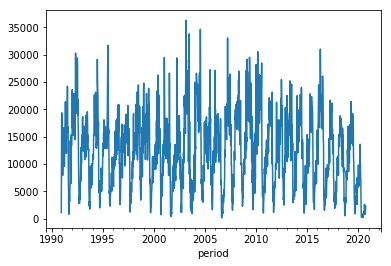

In [18]:
sorted_data['inc'].plot()

In [20]:
first_september_week  = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                         for y in range(1991,sorted_data.index[-1].year)]

In [22]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

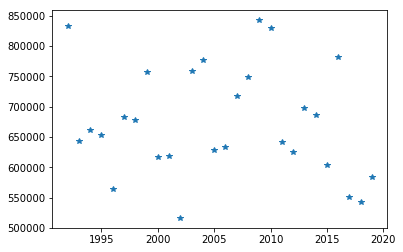

In [23]:
yearly_incidence.plot(style='*')

In [24]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64